In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
import sklearn

In [ ]:
'''
Készíts egy függvényt, betölti majd vissza adja az iris adathalmazt.


Egy példa a kimenetre: iris
return type: sklearn.utils.Bunch
függvény neve: load_iris_data
'''

In [2]:
def load_iris_data() -> sklearn.utils.Bunch:
    iris = load_iris()
    return iris

# iris = load_iris_data()

In [ ]:
'''
Készíts egy függvényt, ami a betölti az virágokhoz tartozó levél méretket egy dataframebe, majd az első 5 sort visszaadja.
Minden oszlop tartalmazza, hogy az milyen mérethez tartozik.

Egy példa a bemenetre: iris
Egy példa a kimenetre: iris_df
return type: pandas.core.frame.DataFrame
függvény neve: check_data
'''

In [20]:
def check_data(iris: sklearn.utils.Bunch) -> pd.core.frame.DataFrame:
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    return df.head(5)

# check_data(iris)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
''' 
Készíts egy függvényt ami előkészíti az adatokat egy lineaáris regressziós model feltanításához.
Featurejeink legyenek a levél méretek kivéve a "sepal length (cm)", ez legyen a targetünk.

Egy példa a bemenetre: iris
Egy példa a kimenetre: X, y
return type: (numpy.ndarray, numpy.ndarray)
'''

In [4]:
from typing import Tuple

def linear_train_data(iris: sklearn.utils.Bunch) -> Tuple[np.ndarray, np.ndarray]:
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    X = df[['sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values
    y = df['sepal length (cm)'].values
    return X, y

# lin_X, lin_y = linear_train_data(iris)

# print(lin_X)
# print(lin_y)


[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]


In [ ]:
''' 
Készíts egy függvényt ami előkészíti az adatokat egy logisztikus regressziós model feltanításához.
Featurejeink legyenek a levél méretek, targetünk pedig a 0, 1-es virág osztályok.
Fontos csak azokkal az adatokkal tanítsunk amihez tartozik adott target. 

Egy példa a bemenetre: iris
Egy példa a kimenetre: X, y
return type: (numpy.ndarray, numpy.ndarray)
'''

In [5]:
def logistic_train_data(iris: sklearn.utils.Bunch) -> Tuple[np.ndarray, np.ndarray]:
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    X = df.loc[np.where(iris.target < 2)].values
    y = iris.target[np.where(iris.target < 2)]

    return X, y

# log_X, log_y = logistic_train_data(iris)

# print(log_X)
# print(log_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
'''
Készíts egy függvényt ami feldarabolja az adatainkat train és test részre. Az adatok 20%-át használjuk fel a teszteléshez.
Tegyük determenisztikussá a darabolást, ennek értéke legyen 42.

Egy példa a bemenetre: X, y
Egy példa a kimenetre: X_train, X_test, y_train, y_test
return type: (numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)
'''

In [24]:
def split_data(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

# X_lin_train, X_lin_test, y_lin_train, y_lin_test = split_data(lin_X, lin_y)
# X_log_train, X_log_test, y_log_train, y_log_test = split_data(log_X, log_y)

In [ ]:
'''
Készíts egy függvényt ami feltanít egy lineaáris regressziós modelt, majd visszatér vele.

Egy példa a bemenetre: X_train, y_train
Egy példa a kimenetre: model
return type: sklearn.linear_model._base.LinearRegression
'''

In [25]:
def train_linear_regression(X_train:np.ndarray, y_train:np.ndarray) -> sklearn.linear_model._base.LinearRegression:
    return LinearRegression().fit(X_train, y_train)

# linear_model = fit_linear(X_lin_train, y_lin_train)

In [ ]:
'''
Készíts egy függvényt ami feltanít egy logisztikus regressziós modelt, majd visszatér vele.

Egy példa a bemenetre: X_train, y_train
Egy példa a kimenetre: model
return type: sklearn.linear_model._base.LogisticRegression
'''

In [29]:
def train_logistic_regression(X_train:np.ndarray, y_train:np.ndarray) -> sklearn.linear_model._logistic.LogisticRegression:
    return LogisticRegression(solver='liblinear', random_state=42).fit(X_train, y_train)

# logistic_model = train_logistic_regression(X_log_train, y_log_train)

In [ ]:
''' 
Készíts egy függvényt, ami a feltanított modellel predikciót tud végre hajtani.

Egy példa a bemenetre: model, X_test
Egy példa a kimenetre: y_pred
return type: numpy.ndarray
'''

In [31]:
def predict(model, X_test):
    return model.predict(X_test)

# y_lin_pred = predict(linear_model, X_lin_test)
# y_log_pred = predict(logistic_model, X_log_test)

In [ ]:
'''
Készíts egy függvényt, ami vizualizálni tudja a label és a predikciók közötti eltérést.
Használj scatter plotot a diagram elkészítéséhez.

Diagram címe legyen: 'Actual vs Predicted Target Values'
Az x tengely címe legyen: 'Actual'
Az y tengely címe legyen: 'Predicted'

Egy példa a bemenetre: y_test, y_pred
Egy példa a kimenetre: scatter plot
return type: matplotlib.figure.Figure
'''

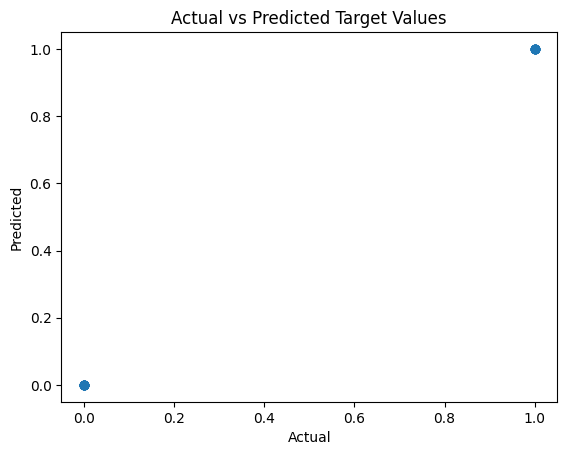

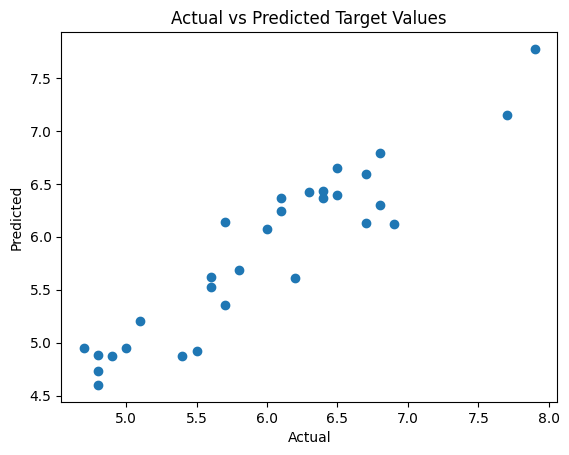

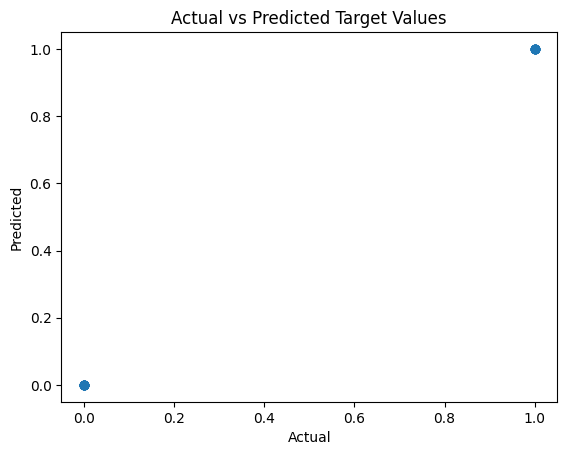

In [36]:
def plot_actual_vs_predicted(y_test, y_pred):
    fig, ax = plt.subplots()
    
    ax.set_title('Actual vs Predicted Target Values')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

    ax.scatter(y_test, y_pred)

    return fig

# visualize(y_lin_test, y_lin_pred)
# visualize(y_log_test, y_log_pred)

In [ ]:
''' 
Készíts egy függvényt, ami a Négyzetes hiba (MSE) értékét számolja ki a predikciók és a valós értékek között.

Egy példa a bemenetre: y_test, y_pred
Egy példa a kimenetre: mse
return type: float
'''

In [38]:
def evaluate_model(y_test, y_pred) -> float:
    return mean_squared_error(y_test, y_pred)

# mse(y_lin_test, y_lin_pred)
# mse(y_log_test, y_log_pred)

0.0